# Define problems: 

* User sets an exercise goal, and wants the appropriate sport.

* User wants to explore, given his/her exercise history.
## $\Rightarrow$ Multi-class Classification

# Outline
1. EDA for classification

2. Classifiers:
    * Logistic Regression
    * Support Vector Machine
    * XGBoost

3. Error Analysis

# EDA for multi-class classification

In [1]:
import pandas as pd 
import numpy as np
import joblib
import pickle
from Utils.Transformer import Transformer
from Utils.label_encoder import label_encoder


import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, Normalize
from IPython.display import display, Markdown
from scipy.stats import *

import sklearn as sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.preprocessing import PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_auc_score, accuracy_score,precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report, plot_confusion_matrix

import xgboost
from xgboost import XGBRegressor
from xgboost import XGBClassifier

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=ConvergenceWarning)

%matplotlib inline

In [7]:
df_raw = pd.read_pickle("./data/df_proper_cleaned.pkl")

In [8]:
df_raw

,id,userId,gender,sport,heart_rate_mean,heart_rate_std,duration_s,start_end,altitude_mean,altitude_std,...,descend_m,distance_mean_m,distance_std_m,distance_total_m,speed_mean,speed_std,ave_longitude,ave_latitude,calories,start_time
0,396826535,10921915,male,bike,152.650,10.229736,7590.0,"[1408898746.0, 1408906335.0]",43.071200,13.475900,...,413.000000,106.309446,57.798961,53049.413644,7.117435,2.182678,24.480066,60.182107,1563.0,2014-08-24T09:45:46.000Z
1,392337038,10921915,male,bike,147.710,10.970046,4441.0,"[1408221682.0, 1408226122.0]",35.724800,10.376062,...,228.800000,65.063260,42.196571,32467.566953,7.550103,2.272863,24.546053,60.179142,909.0,2014-08-16T13:41:22.000Z
2,389643739,10921915,male,bike,140.554,11.319500,6750.0,"[1407858459.0, 1407865208.0]",62.425600,13.217515,...,352.400000,90.798738,50.482550,45309.570377,7.154326,2.150951,24.505033,60.174214,1139.0,2014-08-12T08:47:39.000Z
3,386729739,10921915,male,bike,147.020,11.414885,4520.0,"[1407432042.0, 1407436561.0]",32.610400,11.417463,...,238.600000,65.188197,41.980981,32529.910062,7.416873,2.201268,24.544119,60.179844,922.0,2014-08-07T10:20:42.000Z
4,383186560,10921915,male,bike (transport),167.154,10.414523,1358.0,"[1406909434.0, 1406910791.0]",22.762000,8.383674,...,107.400000,23.918070,23.000186,11936.117059,8.721936,2.388718,24.731128,60.178065,351.0,2014-08-01T09:10:34.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167777,596953078,69,male,run,140.498,8.853135,5123.0,"[1333545094.0, 1333550216.0]",35.584400,22.812477,...,133.400000,32.008984,9.230426,15973.483084,3.113191,0.350988,11.776630,55.259740,1555.0,2012-04-04T06:11:34.000Z
167778,30369221,69,male,run,169.894,12.732587,701.0,"[1323017480.0, 1323018180.0]",14.599420,5.357932,...,85.557119,5.598007,2.138988,2794.405650,3.985560,0.499092,11.761551,55.255314,281.0,2011-12-04T08:51:20.000Z
167779,596955589,69,male,bike,108.846,22.735221,3390.0,"[1320184906.0, 1320188295.0]",13.930400,2.401365,...,19.700000,5.828178,4.111083,2909.260612,1.581994,1.098630,11.772075,55.241970,206.0,2011-11-01T15:01:46.000Z
167780,24888434,69,male,run,160.842,9.856421,721.0,"[1317828485.0, 1317829205.0]",49.900939,5.624594,...,100.938300,5.605276,2.102335,2798.032946,3.887304,0.527690,11.574002,55.309811,293.0,2011-10-05T08:28:05.000Z


### *Prob(heart rate* | *sport, gender)*

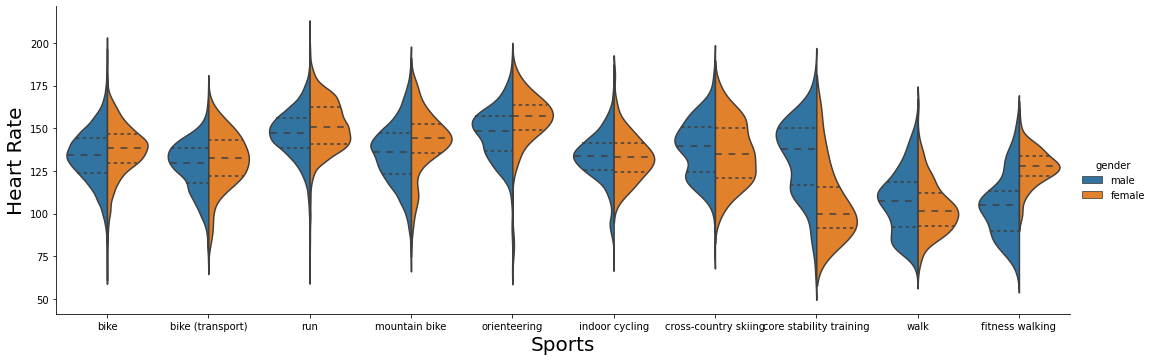

In [5]:
sport_top_10 = df_raw.sport.value_counts().nlargest(10)
df_=df_raw[df_raw['sport'].isin(sport_top_10.index) & df_raw['gender'].isin(['male','female'])]
sns.catplot(x="sport", y="heart_rate_mean", hue="gender", 
            data=df_, kind="violin",  split=True, scale="width", 
            inner="quart", aspect=3)
plt.xlabel('Sports',fontsize=20),plt.ylabel('Heart Rate',fontsize=20);

### *Prob(sport* | *calories, heart rate, speed, duration, ... )*

In [117]:
df_raw.sport.value_counts()

bike                       69881
run                        69804
mountain bike              10676
bike (transport)            7638
indoor cycling              1249
walk                        1237
orienteering                 867
cross-country skiing         786
core stability training      405
fitness walking              291
skate                        257
roller skiing                238
hiking                       235
circuit training              81
kayaking                      76
rowing                        70
weight training               66
soccer                        48
downhill skiing               41
gymnastics                     9
Name: sport, dtype: int64

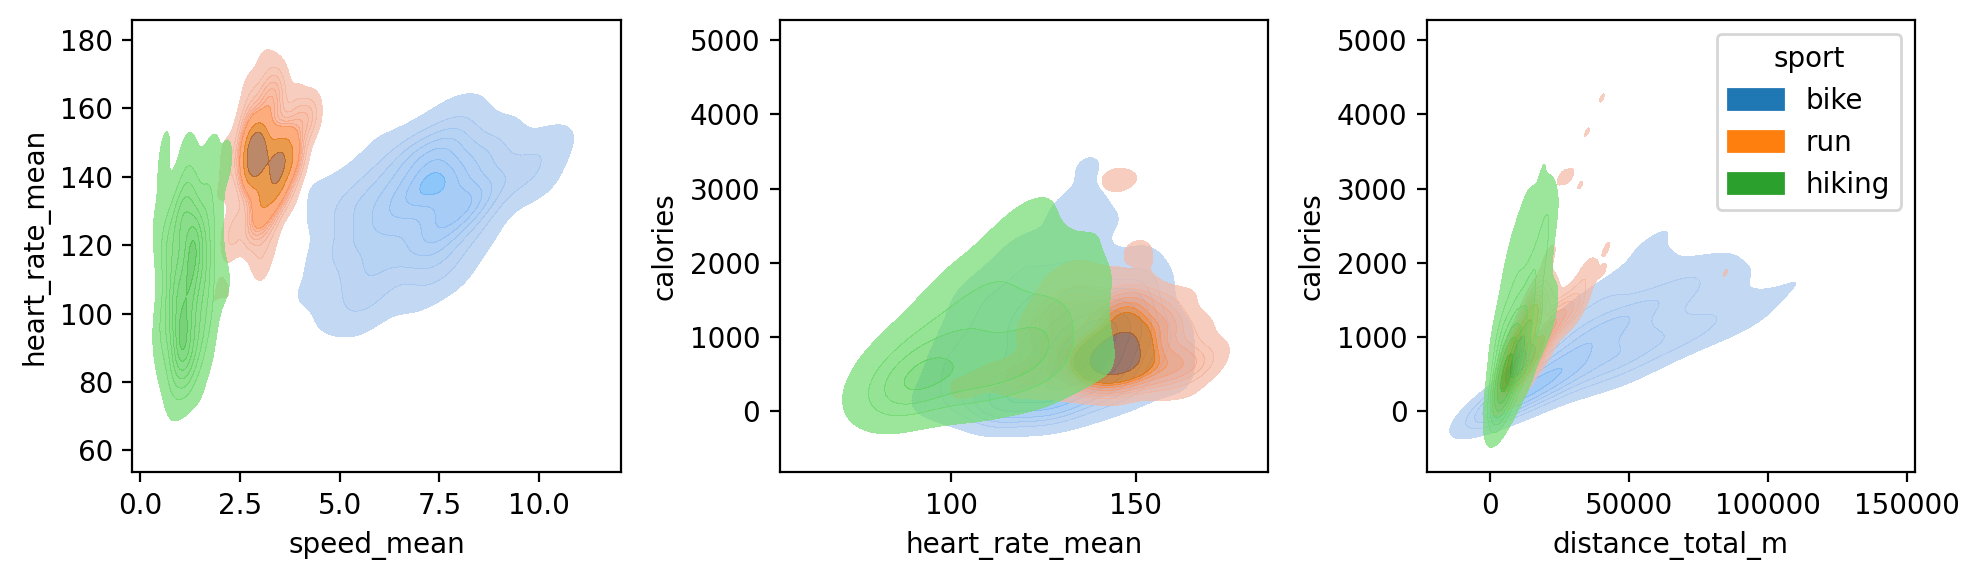

In [137]:
#sport_top_10 = df_raw.sport.value_counts().nlargest(10)
d1 = df_raw[df_raw['sport'].isin(['bike'])]
d2 = df_raw[df_raw['sport'].isin(['run'])]
d3 = df_raw[df_raw['sport'].isin(['hiking'])]
df_ = pd.concat([d1[:500], d2[:500],d3[:500]], axis=0)
df_ = df_[['heart_rate_mean','heart_rate_std','speed_mean','duration_s','distance_total_m','calories','sport','gender']]

fig, axs = plt.subplots(1,3, figsize=(10,3),dpi=200)
hue = 'sport'
alpha = 0.7
sns.kdeplot(ax = axs[0], x='speed_mean', y='heart_rate_mean', data = df_, hue=hue, fill=True,alpha = alpha, legend = False);
sns.kdeplot(ax = axs[1], x='heart_rate_mean', y='calories', data = df_, hue=hue, fill=True,alpha = alpha, legend = False);
sns.kdeplot(ax = axs[2], x='distance_total_m', y='calories', data = df_, hue=hue, fill=True,alpha = alpha)
plt.tight_layout();

### *Prob( heart rate* | *same user, sport, ... )*

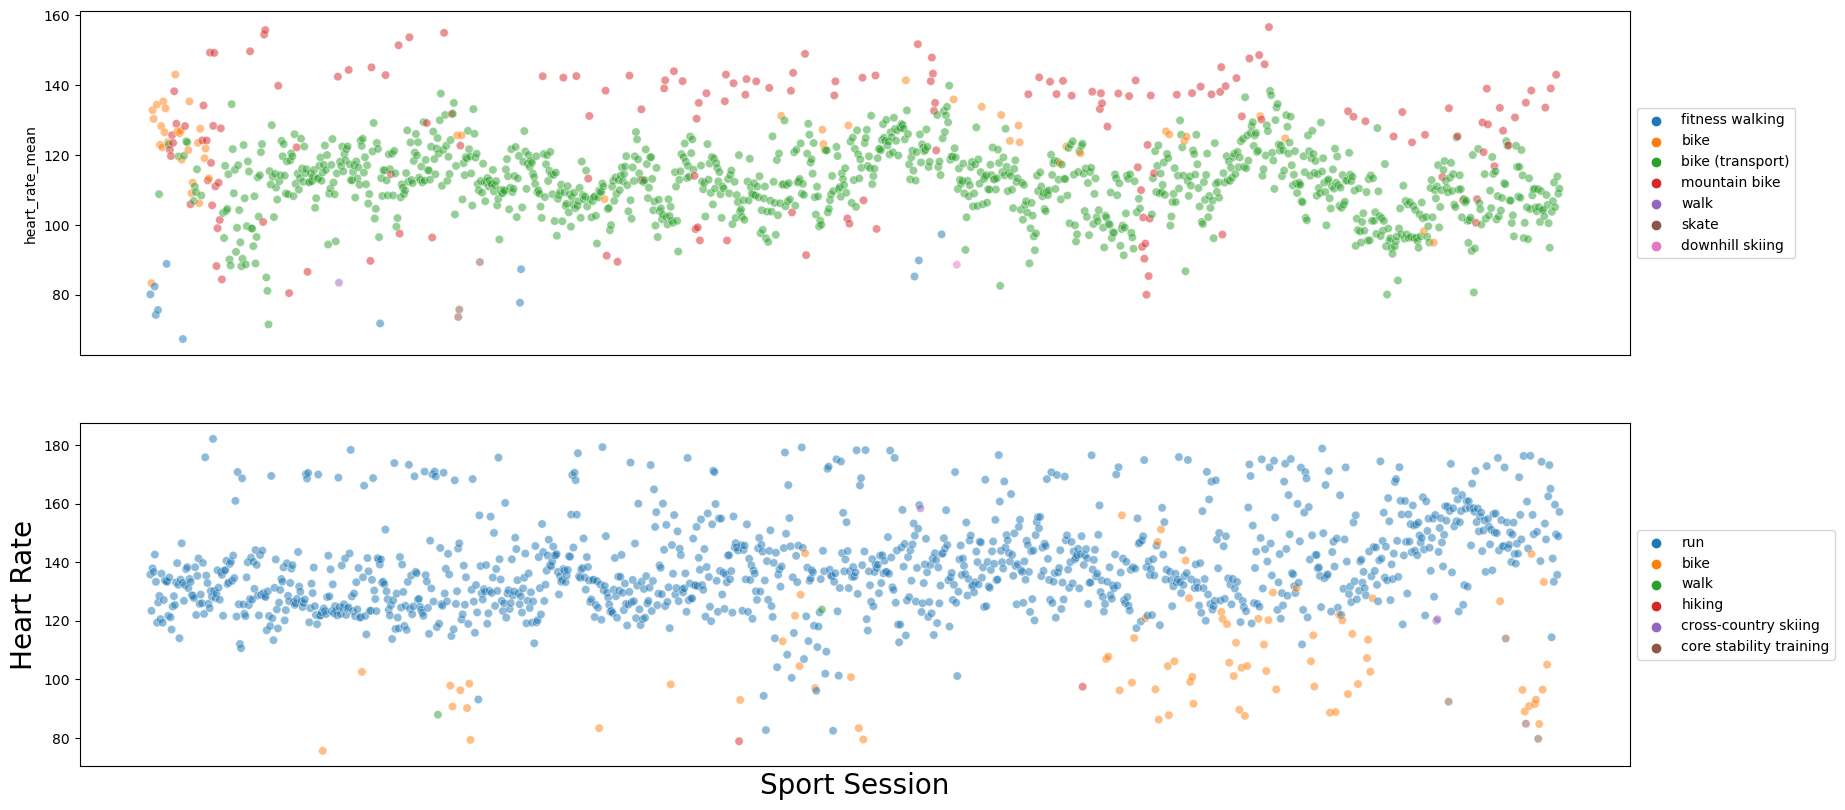

In [110]:
K = 2
user_top_K = df_raw.userId.value_counts().nlargest(K).index

fig, axs = plt.subplots(K,1, figsize=(20,10), dpi=100)
for i, userId in enumerate(user_top_K):
    df_top_user = df_raw[df_raw['userId']==userId]
    axs[i].tick_params(bottom=False,labelbottom=False)
    sns.scatterplot( data=df_top_user,
                     x='start_time',
                     y='heart_rate_mean',
                     hue='sport',
                     #style='sport',
                     #palette='viridis',
                     #size = 50,
                     alpha=0.5,
                     ax=axs[i]);
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.xlabel('Sport Session',fontsize=20), plt.ylabel('Heart Rate',fontsize=20);

# Multi-class Classification Problem

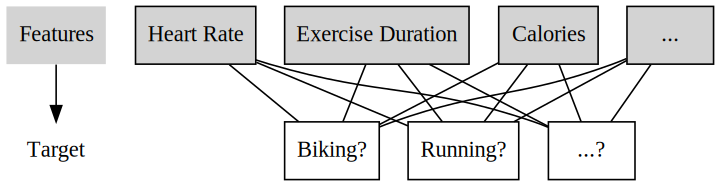

In [52]:
import graphviz 
from IPython.display import display
    
source= '''\
digraph classficiation{
node [shape=box style=filled]
size="10,10!" 
t0[label="Target" fillcolor=none, penwidth=0]
t1[label="Biking?" fillcolor=none]
t2[label="Running?" fillcolor=none]
t3[label="...?" fillcolor=none]
f0[label="Features",penwidth=0]
f1[label="Heart Rate"]
f2[label="Exercise Duration"]
f3[label="Calories"]
f4[label="..."]

f1->{t1 t2 t3}[arrowhead = none];
f2->{t1 t2 t3}[arrowhead = none];
f3->{t1 t2 t3}[arrowhead = none];
f4->{t1 t2 t3}[arrowhead = none];
f0->t0
{rank = same;
edge[style=invis]
f0->f1->f2->f3->f4}
}
'''

display(graphviz.Source(source))

In [9]:
train_raw, test_raw = train_test_split(df_raw.reset_index(drop=True), test_size=0.1, random_state=42)
print(df_raw.shape)
print(train_raw.shape)
print(test_raw.shape)

(163955, 21)
(147559, 21)
(16396, 21)


In [10]:
target = 'sport'
features = ['sport', 'gender', 'heart_rate_mean', 'heart_rate_std', 'altitude_mean',
           'altitude_std', 'ascend_m', 'descend_m', 'distance_total_m',
           'speed_mean', 'speed_std', 'duration_s', 'calories', 'start_time']

features.remove(target)

In [57]:
df_raw['sport'].value_counts()

bike                       69881
run                        69804
mountain bike              10676
bike (transport)            7638
indoor cycling              1249
walk                        1237
orienteering                 867
cross-country skiing         786
core stability training      405
fitness walking              291
skate                        257
roller skiing                238
hiking                       235
circuit training              81
kayaking                      76
rowing                        70
weight training               66
soccer                        48
downhill skiing               41
gymnastics                     9
Name: sport, dtype: int64

In [59]:
train_raw, test_raw = train_test_split(df_raw, test_size=0.1, random_state=42, 
                                       stratify = df_raw[target])

In [61]:
print(df_raw.shape, train_raw.shape, test_raw.shape)
LE = label_encoder(df_raw)
y_train =  LE.encoder(train_raw[target])
y_test = LE.encoder(test_raw[target])

(163955, 21) (147559, 21) (16396, 21)


# Classification Models


## 1. Logistic Regression Classifier

In [62]:
search = joblib.load("./trained_models/gs_model_lor.pkl")
search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        <Utils.Transformer.Transformer object at 0x7fea80a65e80>),
                                       ('rescale', RobustScaler()),
                                       ('lor',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=20,
                                                           multi_class='ovr',
                                                           solver='sag'))]),
             n_jobs=-1, param_grid={'lor__C': [10]}, scoring='roc_auc_ovr',
             verbose=1)

In [67]:
y_train_pred_lor = search.predict(train_raw[features])
y_test_pred_lor = search.predict(test_raw[features])
y_train_pred_proba_lor = search.predict_proba(train_raw[features])
y_test_pred_proba_lor = search.predict_proba(test_raw[features])

print('\033[91m'+ '======== Logistic Regression ==========')
ruc_train = roc_auc_score(y_train, y_train_pred_proba_lor, average='weighted', multi_class='ovr')
ruc_test = roc_auc_score(y_test, y_test_pred_proba_lor, average='weighted', multi_class='ovr')
print(f'AUC ROC averaged on Train ={ruc_train: .3f}')
print(f'AUC ROC averaged on  Test ={ruc_test: .3f}')

#print('=====================Logistic Regression Train =====================')
#print(classification_report(y_train,y_train_pred_lor))
print('\033[90m' + '=====================Logistic Regression  Test =====================')
print(classification_report(y_test,y_test_pred_lor))

======== Logistic Regression ==========
AUC ROC averaged on Train = 0.933
AUC ROC averaged on  Test = 0.931
=====================Logistic Regression  Test =====================
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      6988
           1       0.94      0.87      0.90      6981
           2       0.43      0.34      0.38      1068
           3       0.25      0.35      0.29       764
           4       0.08      0.02      0.04       125
           5       0.34      0.53      0.41       124
           6       0.10      0.10      0.10        87
           7       0.12      0.49      0.19        79
           8       0.02      0.05      0.03        40
           9       0.11      0.52      0.18        29
          10       0.02      0.19      0.03        26
          11       0.02      0.46      0.05        24
          12       0.15      0.43      0.22        23
          13       0.00      0.00      0.00         8
          14

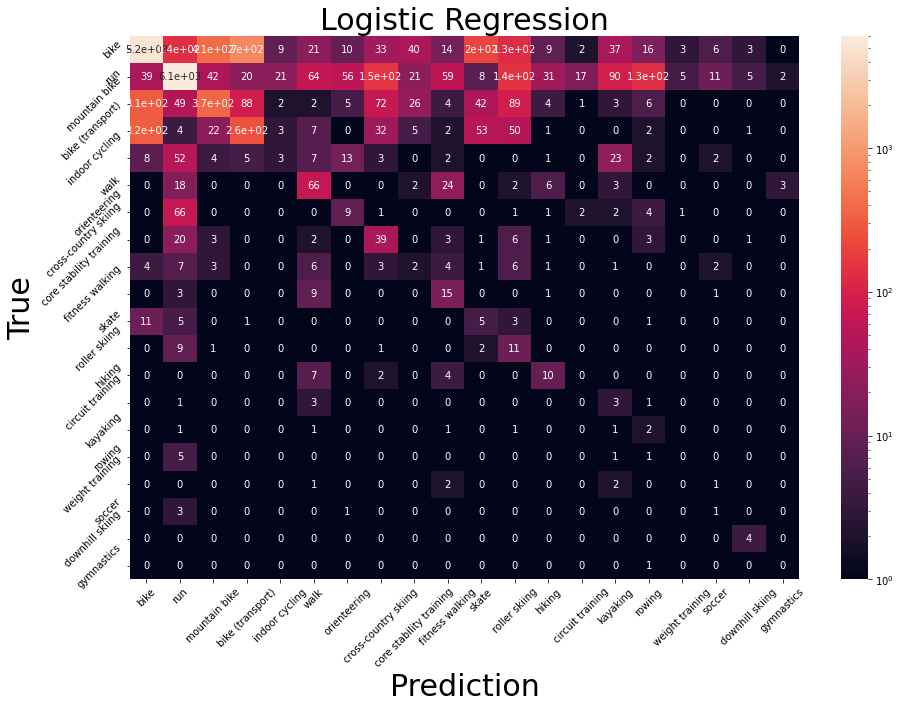

In [105]:
cm_lor = confusion_matrix(y_test, y_test_pred_lor)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_lor, annot=True, norm=LogNorm(vmin=1.0, clip=True), ax=ax); # heatmap in log scale
ax.set_xticklabels(LE.sports, rotation=45)
ax.set_yticklabels(LE.sports, rotation=45)
plt.title('Logistic Regression',fontsize=30)
plt.xlabel('Prediction', fontsize=30), plt.ylabel('True', fontsize=30);

## 2. SVM Classifier

In [27]:
search = joblib.load("./trained_models/gs_model_svc.pkl")
search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        <Utils.Transformer.Transformer object at 0x7feaa87c51f0>),
                                       ('rescale', MinMaxScaler()),
                                       ('svc',
                                        SVC(max_iter=20, probability=True))]),
             n_jobs=-1, param_grid={'svc__C': [10]}, scoring='roc_auc_ovr',
             verbose=1)

In [ ]:
#y_train_pred_svc = search.predict(train_raw[features])
y_test_pred_svc = search.predict(test_raw[features])
#y_train_pred_proba_svc = search.predict_proba(train_raw[features])
y_test_pred_proba_svc = search.predict_proba(test_raw[features])


In [70]:
print('\033[91m'+'======== SVM ==========')
ruc_train = roc_auc_score(y_train, y_train_pred_proba_svc, average='weighted', multi_class='ovr')
ruc_test = roc_auc_score(y_test, y_test_pred_proba_svc, average='weighted', multi_class='ovr')
print(f'AUC ROC averaged on Train ={ruc_train: .3f}')
print(f'AUC ROC averaged on  Test ={ruc_test: .3f}')

#print('=====================SVM Train =====================')
#print(classification_report(y_train,y_train_pred_svc))
print('\033[90m'+'=====================SVM  Test =====================')
print(classification_report(y_test,y_test_pred_svc))

======== SVM ==========
AUC ROC averaged on Train = 0.513
AUC ROC averaged on  Test = 0.516
=====================SVM  Test =====================
              precision    recall  f1-score   support

           0       0.40      0.11      0.17      6988
           1       0.56      0.01      0.02      6981
           2       0.10      0.07      0.08      1068
           3       0.00      0.00      0.00       764
           4       0.01      0.06      0.02       125
           5       0.08      0.02      0.04       124
           6       0.00      0.00      0.00        87
           7       0.00      0.00      0.00        79
           8       0.00      0.00      0.00        40
           9       0.00      0.00      0.00        29
          10       0.00      0.00      0.00        26
          11       0.00      0.46      0.00        24
          12       0.01      0.30      0.03        23
          13       0.01      0.25      0.02         8
          14       0.00      0.14      0.00 

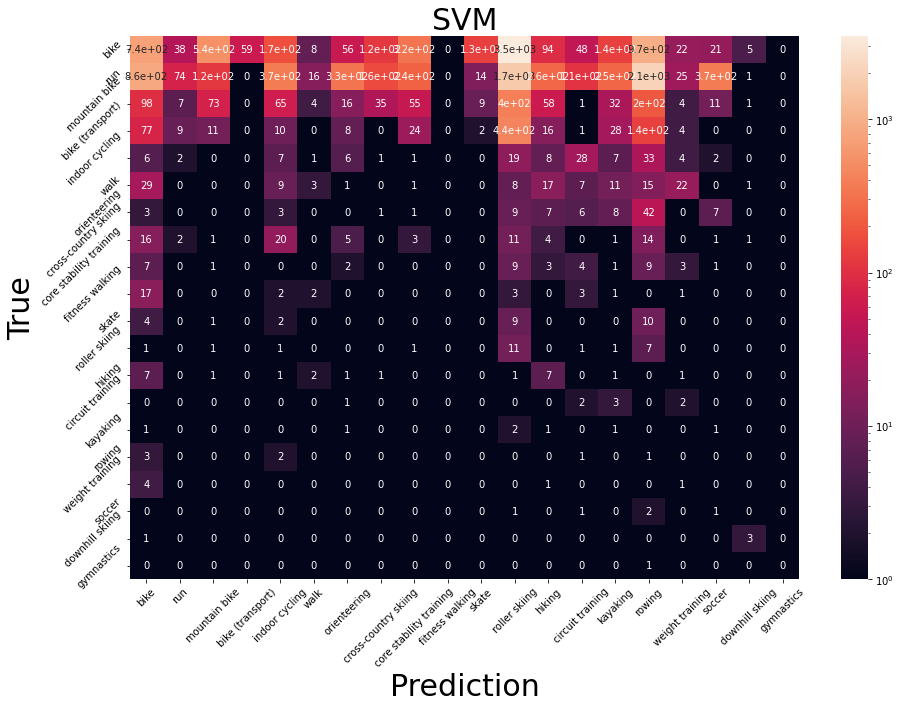

In [103]:
cm_svc = confusion_matrix(y_test, y_test_pred_svc)
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(cm_svc, annot=True, norm=LogNorm(vmin=1.0, clip=True), ax=ax); # heatmap in log scale
ax.set_xticklabels(LE.sports, rotation=45)
ax.set_yticklabels(LE.sports, rotation=45)
plt.title('SVM',fontsize=30)
plt.xlabel('Prediction', fontsize=30), plt.ylabel('True', fontsize=30);

## 3. XGBoost Classifier

In [106]:
search = joblib.load("./trained_models/gs_model_xgbc.pkl")
search

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        <Utils.Transformer.Transformer object at 0x7fea8dc1b880>),
                                       ('xgbc',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                                      learning_rate=None,
               

In [77]:
y_train_pred_xgbc = search.predict(train_raw[features])
y_test_pred_xgbc = search.predict(test_raw[features])

y_train_pred_proba_xgbc = search.predict_proba(train_raw[features])
y_test_pred_proba_xgbc = search.predict_proba(test_raw[features])

print('\033[91m' + '======== XGBoost Classifier ==========')
ruc_train = roc_auc_score(y_train, y_train_pred_proba_xgbc, average='weighted', multi_class='ovr')
ruc_test = roc_auc_score(y_test, y_test_pred_proba_xgbc, average='weighted', multi_class='ovr')
print(f'AUC ROC averaged on Train ={ruc_train: .3f}')
print(f'AUC ROC averaged on  Test ={ruc_test: .3f}')

#print('=====================XGBClassifier Train =====================')
#print(classification_report(y_train,y_train_pred_xgbc))
print('\033[90m' +'=====================XGBoost Classifier  Test =====================')
print(classification_report(y_test,y_test_pred_xgbc))

======== XGBoost Classifier ==========
AUC ROC averaged on Train = 0.994
AUC ROC averaged on  Test = 0.985
=====================XGBoost Classifier  Test =====================
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6988
           1       0.97      0.98      0.97      6981
           2       0.70      0.54      0.61      1068
           3       0.90      0.60      0.72       764
           4       0.78      0.73      0.76       125
           5       0.76      0.89      0.82       124
           6       0.79      0.53      0.63        87
           7       0.76      0.49      0.60        79
           8       0.50      0.28      0.35        40
           9       0.86      0.62      0.72        29
          10       0.33      0.04      0.07        26
          11       0.91      0.42      0.57        24
          12       0.65      0.48      0.55        23
          13       1.00      0.50      0.67         8
          14  

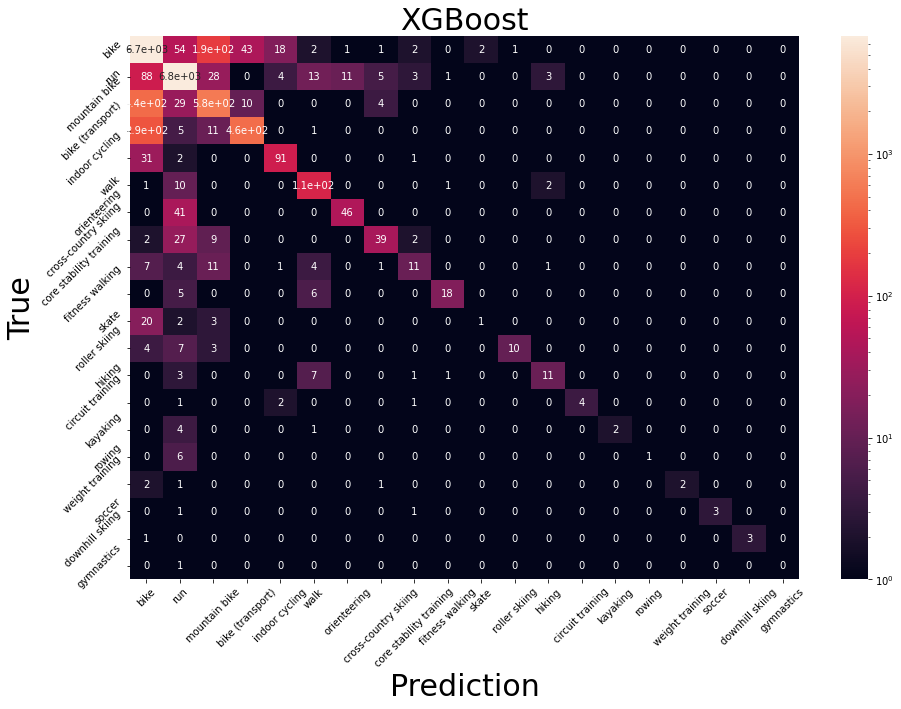

In [104]:
cm_xgbc = confusion_matrix(y_test, y_test_pred_xgbc)
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(cm_xgbc, annot=True, norm=LogNorm(vmin=1.0, clip=True), ax=ax); # heatmap in log scale
ax.set_xticklabels(LE.sports, rotation=45)
ax.set_yticklabels(LE.sports, rotation=45)
plt.title('XGBoost',fontsize=30)
plt.xlabel('Prediction', fontsize=30), plt.ylabel('True', fontsize=30);

# Feature Importances: XGBoost classifier

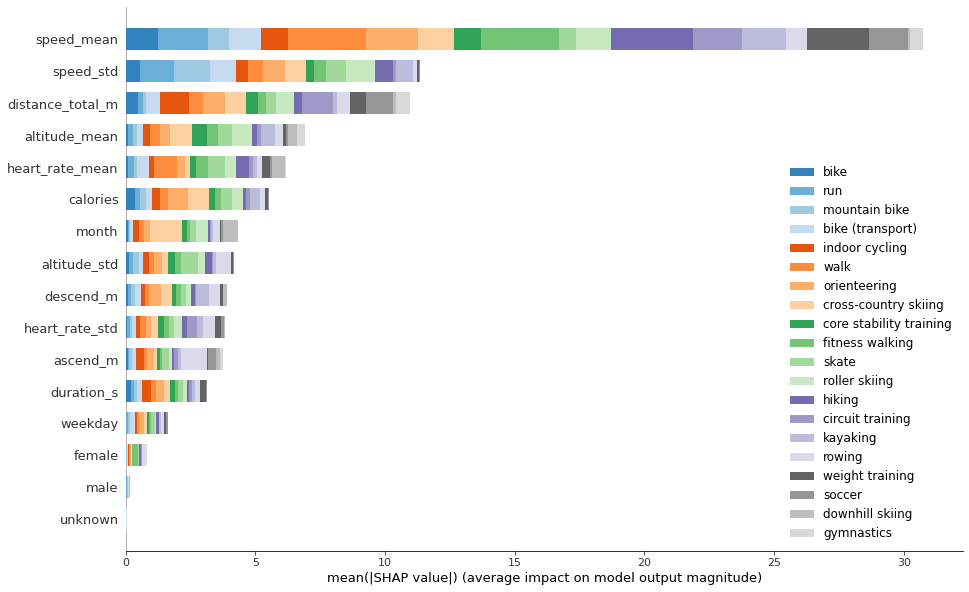

In [144]:
import shap
import matplotlib.pyplot as plt

shap_model = search.best_estimator_['xgbc']
X_test = Transformer().fit_transform(test_raw[features][:200])

shap_values = shap.TreeExplainer(shap_model).shap_values(X_test)
shap.summary_plot(shap_values, X_test, 
                  plot_size=(15,10),
                  max_display=len(X_test),
                  class_inds='original',
                  color=plt.get_cmap("tab20c"),
                  class_names= LE.sports,
                  )

### Error Analysis: XGBoost classifier

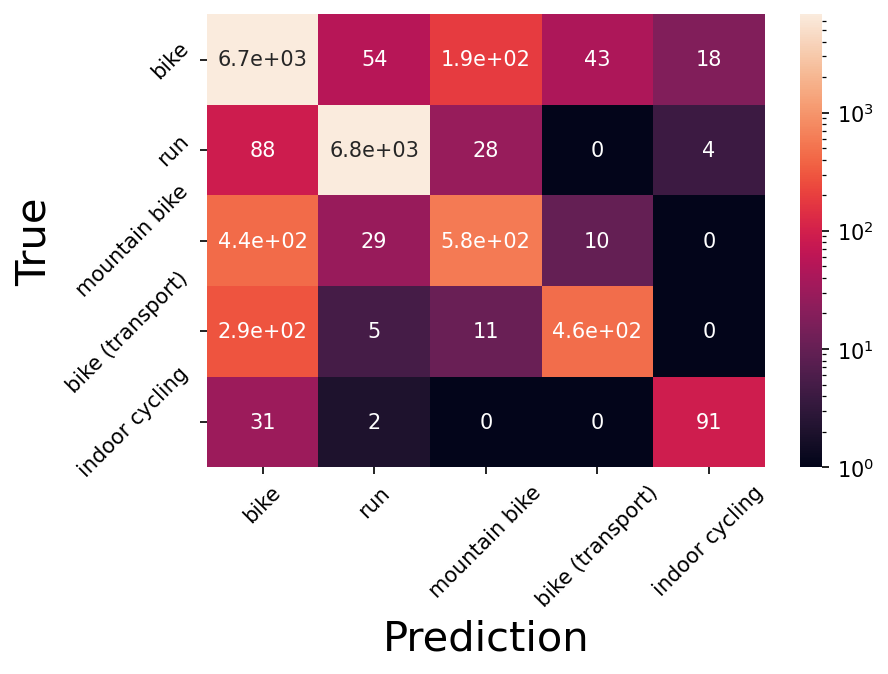

In [149]:
K = 5
fig, ax = plt.subplots(figsize=(6,4),dpi=150)
sns.heatmap(cm_xgbc[:K,:K], annot=True,  norm=LogNorm(vmin=1.0, clip=True), ax=ax); # heatmap in log scale
ax.set_xticklabels(LE.sports[:K], rotation=45)
ax.set_yticklabels(LE.sports[:K], rotation=45)
plt.xlabel('Prediction', fontsize=20), plt.ylabel('True', fontsize=20);

# More to come..